In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

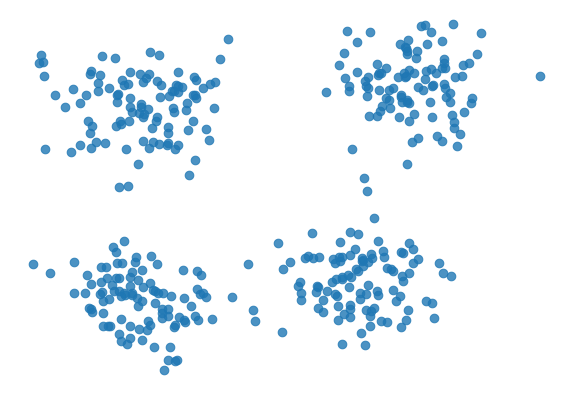

In [37]:
'four-blobs dataset'
fig, ax = plt.subplots(figsize=(10,7))

X = np.zeros((400,2)) #2 features; 400 data points
X[0:100] =   1.75*np.random.randn(100,2) + [-5,5] # blob 1
X[100:200] = 1.75*np.random.randn(100,2) + [4,-5] # blob 2
X[200:300] = 1.75*np.random.randn(100,2) + [6,6] # blob 3
X[300:400] = 1.75*np.random.randn(100,2) + [-5,-6]

'plot dataset'
ax.scatter(X[:,0],X[:,1],
           s=75, 
           alpha=0.8,)
ax.axis('off')
#ax.set_title('dataset',fontsize=20)
plt.savefig('fig0.png')
plt.show()

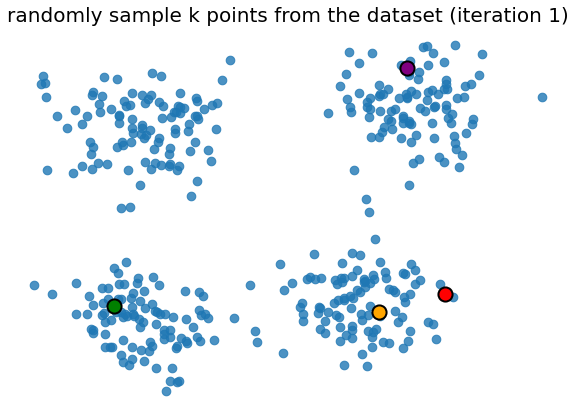

In [53]:
# initialize kmeans
k = 4
m = X.shape[0] # number of data points
means = X[np.random.choice(m,k)] # initial k means

# plot dataset+cluster centers
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X[:,0],X[:,1],
           s=75, 
           alpha=0.8,)
ax.axis('off')
colors_means = ['orange', 'green','red','purple']
for i in range(k):
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                #facecolors='none', 
                c = colors_means[i],
                edgecolors='k',
                linewidth=2, 
                s=200)
ax.set_title('randomly sample k points from the dataset (iteration 1)',fontsize=20)
plt.savefig('fig1.png')
plt.show()

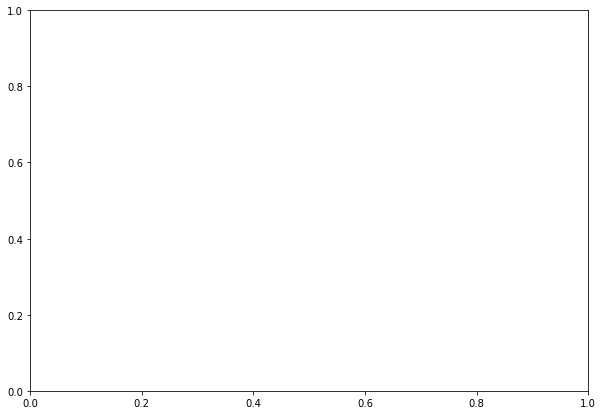

In [54]:
colors_clusters= ['C1','C2','C3','C4']

max_iter = 15
fig, ax = plt.subplots(figsize=(10,7))
for iter in range(max_iter):
    # recompute clusters
    distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T) # squared distances
    clusters = np.argmin(distances, axis=1)
    
    # plot clusters + cluster centers
    
    for i in range(k):
        ax.scatter(X[clusters==i,0],X[clusters==i,1], color = colors_clusters[i]) # cluster
        ax.scatter(means[i,0],means[i,1],
                    marker='o',
                    #facecolors='none', 
                    c = colors_means[i],
                    edgecolors='k',
                    linewidth=2, 
                    s=200)
        ax.set_title('assign each point to the center to which it is closest (iteration '+str(iter+1) +')', fontsize=20)    
    ax.axis('off')
    plt.savefig('fig'+str(2*iter+2))
    ax.clear()
    
    # recompute means
    #fig, ax = plt.subplots(figsize=(10,7))
    means = np.array([np.mean(X[clusters==i], axis=0) for i in range(k)])
    
    # plot clusters + cluster centers
    #fig, ax = plt.subplots(figsize=(10,7))
    for i in range(k):
        ax.scatter(X[clusters==i,0],X[clusters==i,1], color = colors_clusters[i]) # cluster
        ax.scatter(means[i,0],means[i,1],
                    marker='o',
                    #facecolors='none', 
                    c = colors_means[i],
                    edgecolors='k',
                    linewidth=2, 
                    s=200)
    ax.axis('off')    
    ax.set_title('update cluster centers (iteration '+str(iter+2) +')', fontsize=20)
    plt.savefig('fig'+str(2*iter+3))
    ax.clear()

In [58]:
# put images into a .gif
from PIL import Image
import glob

frames = []
imgs = ['fig'+str(i)+'.png' for i in range(17)]
for i in imgs:
    frames.append(Image.open(i))

frames[0].save('kmeans.gif',
               format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=2500,
               loop=0)

In [ ]:
fig.